Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**Jupyter Notebook / `scipy` / `numpy` / `matplotlib` Basics for DSP**,
Winter Semester 2022/23 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

You might find the following resources useful

- Python tutorial
https://nbviewer.jupyter.org/github/mgeier/python-audio/blob/master/intro-python.ipynb

- Python / Jupyter Notebook tutorial
https://nbviewer.jupyter.org/github/spatialaudio/selected-topics-in-audio-signal-processing-exercises/blob/master/intro.ipynb

**Anaconda Environment**

The [Anaconda distribution](https://www.anaconda.com/distribution/) is a convenient solution to install a required environment, i.e. to have access to the Jupyter Notebook renderer with a Python interpreter on a personal computer. It is very likely that a very recent installation of Anaconda already delivers all required packages just using the `base` environment. It is however good practice to create a dedicated environment for each project. So, for this tutorial we might use a `mydsp` (or whatever name works for us) environment.

- get into the folder where the exercises are located, e.g. `cd my_dsp_folder`
- in the subfolder `.binder` the `environment.yml` can be used to create a dedicated conda `mydsp` environment as
    - `conda env create -f environment.yml --force`
    - we can remove this environment with `conda env remove --name mydsp`
- this should also have installed audio related libraries using pip
    - `pip install soundfile==0.10.3.post1`
    - we might check this with `pip list`
- activate this environment with `conda activate mydsp`
- Jupyter notebook renderer needs to know our dedicated environment:
`python -m ipykernel install --user --name mydsp --display-name "mydsp"`
- we might want to archive the actually installed package versions by
    - `python -m pip list > detailed_packages_list_pip.txt` and
    - `conda env export --no-builds > detailed_packages_list_conda.txt`
- start either a Jupyter notebook or Jupyter lab working environment via a local server instance by either `jupyter notebook` or `jupyter lab`
- start the landing page `index.ipynb` of the tutorial
- make sure that the notebooks we want to work with are using our dedicated kernel `mydsp`
- have fun with the playgrounds and start programming stuff by yourself

In [1]:
# most common used packages for DSP, have a look into other scipy submodules,
# such as fft, signal
import matplotlib as mpl
import numpy as np

from matplotlib import pyplot as plt
# from numpy import fft  # use either numpy fft or
from scipy import fft  # scipy fft
from scipy import signal

# Matrix vs. Numpy Packages

The `np.matrix` package is (was) meant for linear algebra on matrices, which by
definition are of dimension m rows $\times$ n columns, i.e. 2D.
So this might be what you're looking for when dealing with linear algebra.
**However**, the community does not recommend to use this package anymore and
it might be even removed in future.

In [2]:
# 4x1 matrix as numpy.matrix object
A = np.matrix([[1], [2], [3], [4]])
print('A.shape = ', A.shape)
print('A = \n', A, '(a column vector)')
print('A.T.shape = ', A.T.shape)
print('A.T = \n', A.T, '(a row vector)')

A.shape =  (4, 1)
A = 
 [[1]
 [2]
 [3]
 [4]] (a column vector)
A.T.shape =  (1, 4)
A.T = 
 [[1 2 3 4]] (a row vector)


Rather, use `np.numpy` arrays, which are then not restricted to $n \times m$
dimensions.

In [3]:
# 4x1 matrix as numpy.array object
A = np.array([1, 2, 3, 4])[:, np.newaxis]  # also check np.expand_dims
print('A.shape = ', A.shape)
print('A = \n', A, '(a column vector)')
print('A.T.shape = ', A.T.shape)
print('A.T = \n', A.T, '(a row vector)')

A.shape =  (4, 1)
A = 
 [[1]
 [2]
 [3]
 [4]] (a column vector)
A.T.shape =  (1, 4)
A.T = 
 [[1 2 3 4]] (a row vector)


There is one concept with numpy arrays that might lead to initial confusion, which
is however a nice and powerful feature: this is the so called **array of rank 1**

In [4]:
# set up rank-1 numpy.array
A = np.array([1, 2, 3, 4])
print('A.shape = ', A.shape)
print('A = ', A)
print('A.T = ', A.T)

A.shape =  (4,)
A =  [1 2 3 4]
A.T =  [1 2 3 4]


Note here, that the shape is not (4,1) as above but rather (4,), this array has one axis. Note that transpose is doing nothing for arrays of rank 1. So this representation differs from the concepts of a column vector $(m \times 1)$ and a row vector $(1 \times n)$, which by means of linear algebra and the matrix idea have two axis, since they are very special matrices.

So, if we really need a *classic* column or row vector, we need to tell this numpy explicitly.
We have done this with the command `np.newaxis` in the above example.
Especially, having strong experience with Matlab and starting with the concept of rank-1 vs. rank-2 arrays might produce initial headache. However, the concept is very powerful, so we should get used to it.

Check https://numpy.org/devdocs/user/numpy-for-matlab-users.html for Matlab vs. numpy

There are some examples given, how to handle some simple cases.  

# Matrix as Numpy Array

In [5]:
# either
A = np.array([[11, 12, 13],
              [21, 22, 23],
              [31, 32, 33],
              [41, 42, 43]])  # shape: (4, 3)

In [6]:
# or
if True:
    A = np.array([[11, 12, 13, 14],
                  [21, 22, 23, 24],
                  [31, 32, 33, 34],
                  [41, 42, 43, 44]])  # shape (4, 4)

In [7]:
print(A)
print(A.shape)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]]
(4, 4)


In [8]:
B = A.T  # transpose
print(B)
print(B.shape)

[[11 21 31 41]
 [12 22 32 42]
 [13 23 33 43]
 [14 24 34 44]]
(4, 4)


# Row / Column Vector vs. Rank-1 Array 

In [9]:
print(A[:, 0])  # this is actually the first column of the matrix returned as
print(A[:, 0].shape)  # rank-1 array

[11 21 31 41]
(4,)


In [10]:
print(A[1, :])  # this is actually the second row returned as
print(A[1, :].shape)  # rank-1 array

[21 22 23 24]
(4,)


If we need column and row vectors explicitly, we might use either `expand_dims`

In [11]:
c = np.expand_dims(A[:, 0], axis=1)
print('1st col\n', c, '\ncol shape', c.shape)

1st col
 [[11]
 [21]
 [31]
 [41]] 
col shape (4, 1)


In [12]:
r = np.expand_dims(A[1, :], axis=0)
print('2nd row\n', r, '\nrow shape', r.shape)

2nd row
 [[21 22 23 24]] 
row shape (1, 4)


or the already used `newaxis`

In [13]:
c = A[:, 0][:, np.newaxis]
print('1st col\n', c, '\ncol shape', c.shape)

1st col
 [[11]
 [21]
 [31]
 [41]] 
col shape (4, 1)


In [14]:
r = A[1, :][np.newaxis, :]
print('2nd row\n', r, '\nrow shape', r.shape)

2nd row
 [[21 22 23 24]] 
row shape (1, 4)


# Inner / Outer Product

Once we get used to rank-1 arrays, we can do nice coding on (what we actually interpret as) vectors (and later
of course on matrices and tensors).

Consider the following matrix A

In [15]:
# for (4,3)-matrix
A = np.array([[11, 12, 13],
              [21, 22, 23],
              [31, 32, 33],
              [41, 42, 43]])
print(A)
c1 = A[:, 0]  # actually 1st col, however a rank-1 array
c2 = A[:, 1]  # actually 2nd col, however a rank-1 array
r2 = A[1, :]  # actually 2nd row, however a rank-1 array
r3 = A[2, :]  # actually 2nd row, however a rank-1 array

[[11 12 13]
 [21 22 23]
 [31 32 33]
 [41 42 43]]


Now, we calculate inner and outer products on the rank-1 arrays 

In [16]:
print(np.outer(c1, r2))  # outer product is producing a matrix
print(np.outer(r2, c1))
print(np.inner(c1, c2))  # inner product yields a scalar, i.e. a single value
print(np.inner(r2, r3))

[[231 242 253]
 [441 462 483]
 [651 682 713]
 [861 902 943]]
[[231 441 651 861]
 [242 462 682 902]
 [253 483 713 943]]
3308
2114


A 4x4 matrix even allows more combinations for inner products. Let's see

In [17]:
A = np.array([[11, 12, 13, 14],
              [21, 22, 23, 24],
              [31, 32, 33, 34],
              [41, 42, 43, 44]])
print(A)
c1 = A[:, 0]  # 1st col
c2 = A[:, 1]  # 2nd col
r2 = A[1, :]  # 2nd row
r3 = A[2, :]  # 2nd row

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]]


In [18]:
print(np.outer(c1, r2))
print(np.outer(r2, c1))
print(np.inner(c1, c2))
print(np.inner(r2, r3))
# and since dimension is ok further inner products:
print(np.inner(c1, r2))
print(np.inner(c1, r3))
print(np.inner(c2, r2))
print(np.inner(c2, r3))

[[231 242 253 264]
 [441 462 483 504]
 [651 682 713 744]
 [861 902 943 984]]
[[231 441 651 861]
 [242 462 682 902]
 [253 483 713 943]
 [264 504 744 984]]
3308
2930
2390
3430
2480
3560


The elegant part of the story is, that we directly see what the code shall do with the data. In other words, we know that the result's dimension is actually a scalar (`inner`) or a matrix (`outer`). We don't need to check the actual data to tell this. Just, compare this with typical Matlab code lines `a.' * b` or `a * b.'`. Here, we better should know the data dimensions to get an idea what the code is intended to do. This is only one advantage of numpy's array concept. 

Recall that an outer product of two vectors yields a matrix of matrix rank 1.

# Numpy Broadcasting

Another very powerful concept is so called broadcasting. There is good material on that, so please start here

- https://numpy.org/doc/stable/user/basics.broadcasting.html

and find many other stuff until familiarized with it.

Elegant data processing is based on heavy usage of broadcasting.

# Matrix Multiplications X = C D

cf. Gilbert Strang, https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/, lecture 3

In [19]:
C = np.array([[1, 2, 3],
              [4, 5, 6]])  # 2D (2, 3)
D = np.array([[7, 8],
              [9, 0],
              [1, 2]])  # 2D (3, 2)
# matrix multiplication C D is 2D (2, 2)
print('C = \n', C)
print('D = \n', D)

C = 
 [[1 2 3]
 [4 5 6]]
D = 
 [[7 8]
 [9 0]
 [1 2]]


In [20]:
X = np.matmul(C, D)
print(X)

[[28 14]
 [79 44]]


In [21]:
X = C @ D  # nice to have this operator that conveniently indicates
# that we operate on matrices, vectors or thinking in numpy: on np.arrays
print(X)

[[28 14]
 [79 44]]


**but not**

In [22]:
if False:
    C * D
# using this operator overloading as Matlab does, is not working here,
# since numpy actually tries to broadcast but cannot, since the
# dimensions for broadcasting do not match

## 1st Way: row x columns (inner product) to get values at individual indices

this is the least enlightening way to see how a matrix $\mathbf{C}$ acts on a
vector or here on a matrix $\mathbf{D}$

In [23]:
# assign variable for result, we expect integer, so assign it
X = np.zeros((2, 2), dtype=int)
for ri in range(2):
    for ci in range(2):
        # inner product = row of C x column of D
        #X [ri, ci] = C[ri, :] @ D[:, ci]
        X[ri, ci] = np.inner(C[ri, :], D[:, ci])
print(X)

[[28 14]
 [79 44]]


## 2nd Way: matrix C x n-th column of D = n-th column of X

- n-th column of X is a linear combination of columns of C, weights in n-th column of D

- here dimensions: (2, 3) x (3, 1) = (2, 1)

- useful mindset for the standard linear algebra problem $\mathbf{A} \mathbf{x} = \mathbf{b}$

In [24]:
#X = np.array([C @ D[:, 0], C @ D[:, 1]]).T
# we need the transpose due to the above discussed characteristics
# on how numpy interprets resulting 1D arrays
X = np.hstack((C @ D[:, 0][:, np.newaxis], C @ D[:, 1][:, np.newaxis]))
print(X)

[[28 14]
 [79 44]]


## 3rd Way: n-th row of C x matrix D = n-th row of X

- n-th row of X is a linear combination of rows of D, weights in n-th row of C
- here dimensions: (1, 3) x (3, 2) = (1, 2)
- useful mindset when doing elimination, such as LU factorization or permutation of rows

In [25]:
# using stacked rows, short version
X = np.vstack((C[0, :] @ D, C[1, :] @ D))
# long version, explicitly define the rows as 2D arrays first
X = np.vstack((C[0, :] @ D[np.newaxis, :], C[1, :] @ D[np.newaxis, :]))
print(X)

[[28 14]
 [79 44]]


## 4th Way: sum of (columns x rows) = sum of outer products
- useful mindset e.g. when C contains independent columns, D contains independent rows, such as heavily used in SVD
- **superposition of rank-1 matrices!**

In [26]:
X = \
    np.outer(C[:, 0], D[0, :]) + \
    np.outer(C[:, 1], D[1, :]) + \
    np.outer(C[:, 2], D[2, :])
print(X)

[[28 14]
 [79 44]]


# Complex Vectors and Inner Product

Let us extend the vector space to complex numbers with two vectors $\mathbf{x}_1$ and $\mathbf{x}_2$.

In [27]:
N = 32
OmegaN = 2*np.pi/N
k = np.arange(N)
x1 = np.exp(+1j*OmegaN * k * 1) / np.sqrt(N)
x2 = np.exp(+1j*OmegaN * k * 2) / np.sqrt(N)

These are complex exponentials and due to the chosen parameters, periodic in $N$. In fact, these can be considered as DFT eigensignals for $N=32$, actually for $\mu=1$ and $\mu=2$.

Let's just plot these signals into one graph. The fastest way is to use `pyplot`, which is an API for `matplotlib` and similar to Matlab. `pyplot` is a good tool for quick'n dirty plots, whereas `matplotlib` gives us full access to any plotting objects, that's the professional way to plot. We leave it here with few simple calls of the `pyplot` API. 

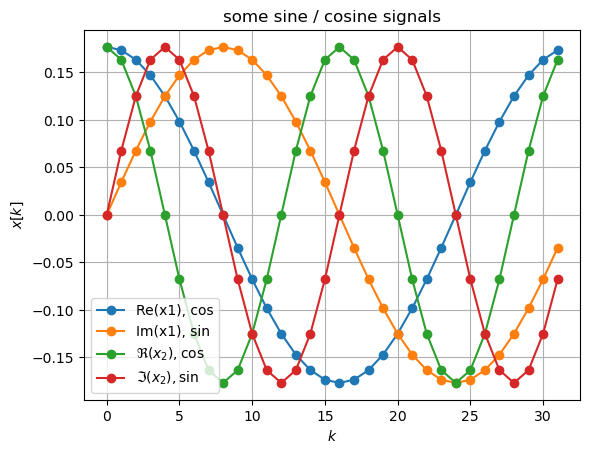

In [28]:
# C0, C1...C9 are matplotlib standard colors
# use them, its on purpose why using exactly this flavoured blue, orange, green, red...
# plain rgb and cmyl colors are not longer favored for nice colored graphs
# due to perceptual reasons

plt.plot(k, x1.real, '-o', color='C0', label='Re(x1), cos')
plt.plot(k, x1.imag, '-o', color='C1', label='Im(x1), sin')

# latex math using raw string
plt.plot(k, np.real(x2), '-o', color='C2', label=r'$\Re(x_2), \mathrm{cos}$')
plt.plot(k, np.imag(x2), '-o', color='C3', label=r'$\Im(x_2), \mathrm{sin}$')

plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.title(r'some sine / cosine signals')

plt.legend()
plt.grid(True)

Back to vectors...

We should know (if not, check the DFT lecture and exercise) that these vectors
are orthonormal, so let us verify this with the **complex inner** product.

In [29]:
np.vdot(x1, x1)  # not exactly 1 due to numerical errors, even with double precision

(0.9999999999999998+0j)

In [30]:
np.dot(np.conj(x1), x1)

(0.9999999999999998+0j)

In [31]:
np.conj(x1) @ x1  # not recommended to do this with a matrix op, but would work

(0.9999999999999998+0j)

In [32]:
np.vdot(x2, x2)  # just always use the vdot()
# for real valued vectors this changes nothing,
# and for complex vectors this handling is failsafe

(0.9999999999999998+0j)

In [33]:
np.vdot(x1, x2)  # we expect 0

(-7.092138049679004e-17-9.759951595843798e-18j)

We get expected results for orthonormal vectors, besides numerical precision errors.

If you don't like complex signals / complex vector space that much, check it
with plain unit amplitude cos() and sin() signals, periodic in $N$, where full
periods fit into the signal length (= vector dimension).

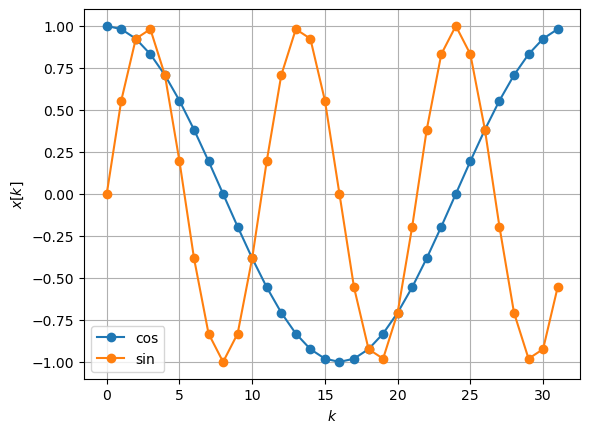

In [34]:
x3 = np.cos(OmegaN * k * 1)
x4 = np.sin(OmegaN * k * 3)

plt.plot(k, x3, 'o-', label='cos')
plt.plot(k, x4, 'o-', label='sin')
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid(True)

In [35]:
np.vdot(x3, x3)  # max

16.0

In [36]:
np.vdot(x3, x4)  # 0

-8.881784197001252e-16

These vectors are orthogonal, but **not orthonormal**.

For real valued signals / vectors the **normal inner** product works as expected.

In [37]:
np.dot(x4, x4)

16.000000000000007

In [38]:
np.dot(x4, x3)

-8.881784197001252e-16

# Surface Plot

This is a simple example of a surface plot using
- `pcolormesh` called with the `matplotlib` API
- discrete valued colorbar based on `viridis` colormap. You might also check the `plasma`, `inferno`,`magma`,`cividis` colormaps for perceptually uniform sequential colormaps. If you need a diverging colormap (such as for nicely indicating positive and negative amplitudes of a waveform) `RdBu`, `seismic`, `bwr` (for non-red/blue colorblind people) do a good job. Colormaps like `jet` or `hsv` are not recommended, they do not match very well with our visual perception of these colorspaces.

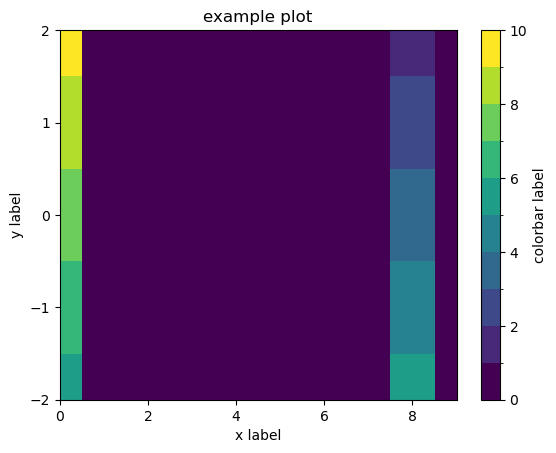

In [39]:
x = np.arange(0, 10)
y = np.arange(-2, 3)
z = np.zeros((5, 10))
# set up most left matrix column with simple entries
z[:, 0] = np.array([5, 6, 7, 8, 9])
# set up most right  matrix column with other entries
z[:, -2] = np.array([5, 4, 3, 2, 1])
# intervals within colorbar and at the same time its ticks
col_tick = np.arange(0, 11)
# do the plot job
cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm(col_tick, cmap.N)
fig, ax = plt.subplots(1, 1)
c = ax.pcolormesh(x, y, z, cmap=cmap, norm=norm)
cbar = fig.colorbar(c, ax=ax, ticks=col_tick[::2], label='colorbar label')
ax.set_xlim(0, 9)
ax.set_ylim(-2, 2)
ax.set_xticks(np.arange(0, 9, 2))
ax.set_yticks(np.arange(-2, 3))
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('example plot');

## Subplots with matplotlib

Text(0.5, 1.0, 'sub 4')

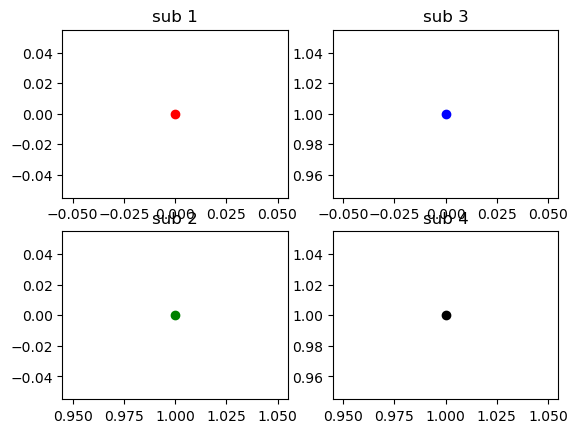

In [40]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(0, 0, 'or')
ax[0, 0].set_title('sub 1')

ax[1, 0].plot(1, 0, 'og')
ax[1, 0].set_title('sub 2')

ax[0, 1].plot(0, 1, 'ob')
ax[0, 1].set_title('sub 3')

ax[1, 1].plot(1, 1, 'ok')
ax[1, 1].set_title('sub 4')

## Subplots with pyplot

Text(0.5, 1.0, 'sub4')

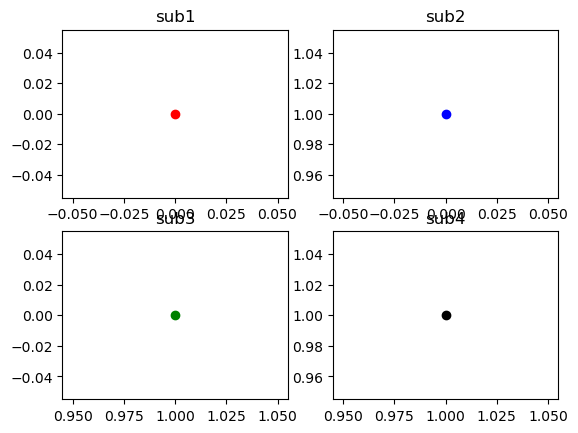

In [41]:
plt.subplot(2, 2, 1)
plt.plot(0, 0, 'or')
plt.title('sub1')

plt.subplot(2, 2, 3)
plt.plot(1, 0, 'og')
plt.title('sub3')

plt.subplot(2, 2, 2)
plt.plot(0, 1, 'ob')
plt.title('sub2')

plt.subplot(2, 2, 4)
plt.plot(1, 1, 'ok')
plt.title('sub4')

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises